### Predict the number of hits landed by Arse in UFC Fight Night: Dos Anjos vs. Lee
https://www.espn.com/mma/fightcenter/_/id/401107798/league/ufc has access to the 3 rounds of 5 minutes fight 5/18/2019
The csv file is found at: https://github.com/JanJanJan2018/FightML/blob/master/ArseErosaFightAudit.csv
Predict the number of hits Arse lands based on the seconds into the round, elapsed since last action, 
cumulative number of hits received/landed/missed and number of hits received total for that round
This data is split into a training set of 70% and a testing set of 30%
based only on those instances action other than circling/standing/stepping away/toward/to the side occurs
There are 224 instances of 156 training set samples of each second of action, 
and the remaining 68 are testing samples of each second of action. Only the first seven fields are used as feature predictor's 
on the hits landed by Arse feature field. Not all other fields used in this analysis.

            

###### Sci-kit learn's (sklearn) Decision Tree with max depth of 2 scored 82% as the best accuracy in prediction
The next best sklearn modular ML algorithms were:
    KNN with 79.4% accuracy
    Random Forest with 76.5 % accuracy 
    logistic Regression with 78% accuracy
    ensemble on logistic 74%, naive bayes 55%, and random forests with 71% accuracy
    decision tree with 5 as max depth was 66% accuracy
    decision tree with 10 as max depth was 69% accuracy
Note: error with the keras perceptron (logistic regression:sigmoid/relu) and multilayer perceptrons (NNs)

In [1]:
%%time

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# Read in the file for the dataset used in the final project due Week 8
df = pd.read_csv('ArseErosaFightAudit.csv')



Wall time: 49.2 s


In [2]:
df.head() #lists Type as the string factor names

,Round,SecondsIntoRound,SecondsLastRoundAction,cmTotHitsR-A,cmTotHitsL-A,cmTotHitsM-A,Hits-Recvd-A,Hits-Lnd-A,Hits-Mssd-A,cmTotHitsR-E,cmTotHitsL-E,cmTotHitsM-E,Hits-Recvd-E,Hits-Lnd-E,Hits-Mssd-E,Time,ArseFighterActionReactions,ErosaFightersActionsReactions
0,1,6,6,0,0,0,0,0,0,0,0,1,0,0,1,9:41,0,misses standing head strike front kick
1,1,19,13,0,0,0,0,0,0,0,0,2,0,0,1,9:54,0,misses standing head strike front kick
2,1,21,2,0,0,0,0,0,0,0,0,3,0,0,1,9:56,0,misses standing head strike R muay thai kick
3,1,24,3,1,0,0,1,0,0,0,1,3,0,1,0,9:59,0,lands low leg muay thai kick
4,1,36,12,1,0,1,0,0,1,0,1,4,0,0,1,10:11,misses R jab,misses L jab


In [3]:
df.columns

Index([u'Round', u'SecondsIntoRound', u'SecondsLastRoundAction',
       u'cmTotHitsR-A', u'cmTotHitsL-A', u'cmTotHitsM-A', u'Hits-Recvd-A',
       u'Hits-Lnd-A', u'Hits-Mssd-A', u'cmTotHitsR-E', u'cmTotHitsL-E',
       u'cmTotHitsM-E', u'Hits-Recvd-E', u'Hits-Lnd-E', u'Hits-Mssd-E',
       u'Time', u'ArseFighterActionReactions',
       u'ErosaFightersActionsReactions'],
      dtype='object')

In [4]:
df.iloc[1:10,[0,1,2,3,4,5,6,8,9,10,11,12]]

,Round,SecondsIntoRound,SecondsLastRoundAction,cmTotHitsR-A,cmTotHitsL-A,cmTotHitsM-A,Hits-Recvd-A,Hits-Mssd-A,cmTotHitsR-E,cmTotHitsL-E,cmTotHitsM-E,Hits-Recvd-E
1,1,19,13,0,0,0,0,0,0,0,2,0
2,1,21,2,0,0,0,0,0,0,0,3,0
3,1,24,3,1,0,0,1,0,0,1,3,0
4,1,36,12,1,0,1,0,1,0,1,4,0
5,1,39,3,2,0,1,1,0,0,2,4,0
6,1,46,7,2,0,2,0,1,0,2,4,0
7,1,49,3,2,0,2,0,0,0,2,5,0
8,1,51,2,2,0,2,0,0,0,2,6,0
9,1,57,6,2,0,3,0,1,0,2,6,0


In [5]:
df.iloc[1:5,0:7]

,Round,SecondsIntoRound,SecondsLastRoundAction,cmTotHitsR-A,cmTotHitsL-A,cmTotHitsM-A,Hits-Recvd-A
1,1,19,13,0,0,0,0
2,1,21,2,0,0,0,0
3,1,24,3,1,0,0,1
4,1,36,12,1,0,1,0


In [6]:
df.describe()

,Round,SecondsIntoRound,SecondsLastRoundAction,cmTotHitsR-A,cmTotHitsL-A,cmTotHitsM-A,Hits-Recvd-A,Hits-Lnd-A,Hits-Mssd-A,cmTotHitsR-E,cmTotHitsL-E,cmTotHitsM-E,Hits-Recvd-E,Hits-Lnd-E,Hits-Mssd-E
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.00000,224.000000,224.000000,224.000000,224.000000
mean,1.964286,136.888393,3.183036,4.357143,7.910714,14.459821,0.120536,0.209821,0.366071,7.406250,4.53125,21.491071,0.191964,0.129464,0.535714
std,0.756776,90.940532,3.481853,3.425981,5.286506,9.077059,0.326316,0.418937,0.527207,5.115715,3.47946,13.257367,0.405929,0.349539,0.542847
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,58.750000,1.000000,2.000000,3.750000,7.750000,0.000000,0.000000,0.000000,3.000000,2.00000,11.000000,0.000000,0.000000,0.000000
50%,2.000000,124.000000,2.000000,4.000000,8.000000,14.000000,0.000000,0.000000,0.000000,7.000000,4.00000,20.000000,0.000000,0.000000,1.000000
75%,3.000000,223.250000,4.000000,5.000000,13.000000,21.000000,0.000000,0.000000,1.000000,12.000000,6.00000,30.250000,0.000000,0.000000,1.000000
max,3.000000,302.000000,20.000000,14.000000,17.000000,35.000000,1.000000,2.000000,2.000000,16.000000,14.00000,54.000000,2.000000,2.000000,2.000000


### Lets make the target variable the 'Hits-lnd-A'-6 based on the first 6 fields: 


## Split the data into 70% Training and 30% Testing Samples

In [7]:
X = df.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12]].values # returns array of all instances other than the target
y = df.iloc[:, 7] .values # returns array of all instances of the target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)

(156L, 12L)
(68L, 12L)
(156L,)
(68L,)
(156L, 12L)


### There are 156 training samples and 68 testing samples with above split of 70-30

In [8]:
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

C:\Users\m\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
print "Training set samples: ", len(X_train)
print "Testing set samples: ", len(X_test)

Training set samples:  156
Testing set samples:  68


In [10]:
X_train_std = X_train_scaled
X_test_std = X_test_scaled

### KNN

In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
% time
knn = KNeighborsClassifier()
knn.fit(X_train,
        y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
% time
y_pred = knn.predict(X_test)#_std)

Wall time: 0 ns


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print cm
print 'Accuracy: ',accuracy_score(y_test, y_pred)


[[51  5]
 [10  2]]
Accuracy:  0.7794117647058824


### Decision Trees


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix



In [15]:
% time
dtc = tree.DecisionTreeClassifier(criterion='entropy')#, max_depth=3)
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)

print "Decision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report"
print classification_report(y_test,predicted)

Wall time: 0 ns
Decision Tree Results
Confusion Matrix: 
[[56  0]
 [ 2 10]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.83      0.91        12

   micro avg       0.97      0.97      0.97        68
   macro avg       0.98      0.92      0.95        68
weighted avg       0.97      0.97      0.97        68



### Decision Tree Regression

In [16]:
#Week 7 ipynb

%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [17]:
import random #keep the same results when running the code, as results vary with each run of code
random.seed(100)

In [18]:
# Fit regression model
% time
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_3 = tree.DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)

# Predict
#X_test = np.arange(0.0, 300, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
% time

Wall time: 0 ns
Wall time: 0 ns


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix



In [20]:
print "Decision Tree Regression Prediction with Max Depth=2" 
print y_1.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results Max Depth=2\nConfusion Matrix: "
print confusion_matrix(y_test,y_1.round())
print "\n Classifcation Report"
print classification_report(y_test,y_1.round())

a=sum(y_1.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_1.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=2"
print round(float(a)/float(b),2),"%"


Decision Tree Regression Prediction with Max Depth=2
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Actual Testing Subset Categorical Values:
[0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Decision Tree Results Max Depth=2
Confusion Matrix: 
[[56  0]
 [ 2 10]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.83      0.91        12

   micro avg       0.97      0.97      0.97        68
   macro avg       0.98      0.92      0.95        68
weighted avg       0.97      0.97      0.97        68

The number of testing samples:
68
The number of correct predictions:
66
[ True  True  True  True  True  True  True  True  True  True  

In [21]:
print "Decision Tree Regression Prediction with Max Depth=5" 
print y_2.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_2.round())
print "\n Classifcation Report"
print classification_report(y_test,y_2.round())

Decision Tree Regression Prediction with Max Depth=5
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Actual Testing Subset Categorical Values:
[0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Decision Tree Results
Confusion Matrix: 
[[56  0]
 [ 2 10]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.83      0.91        12

   micro avg       0.97      0.97      0.97        68
   macro avg       0.98      0.92      0.95        68
weighted avg       0.97      0.97      0.97        68



In [22]:
a=sum(y_2.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_2.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=5"
print round(float(a)/float(b),2),"%"

The number of testing samples:
68
The number of correct predictions:
66
[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]

Accuracy of Decision Tree with Max Depth=5
0.97 %


### Decision Tree with Max Depth = 5 and Max Depth = 10 produced similar results

In [23]:
print "Decision Tree Regression Prediction with Max Depth=10" 
print y_3.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_3.round())
print "\n Classifcation Report"
print classification_report(y_test,y_3.round())

a=sum(y_3.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_3.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=10"
print round(float(a)/float(b),2),"%"

Decision Tree Regression Prediction with Max Depth=10
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Actual Testing Subset Categorical Values:
[0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Decision Tree Results
Confusion Matrix: 
[[55  1]
 [ 2 10]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.91      0.83      0.87        12

   micro avg       0.96      0.96      0.96        68
   macro avg       0.94      0.91      0.92        68
weighted avg       0.96      0.96      0.96        68

The number of testing samples:
68
The number of correct predictions:
65
[ True  True  True  True  True  True  True  True  True  True  True  True


### Ensemble Trees, Voting Classifier
logistic, random forest, and gaussian naive bayes used

In [24]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train_std, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.98 (+/- 0.02) [Logistic Regression]
Accuracy: 0.97 (+/- 0.02) [Random Forest]
Accuracy: 0.97 (+/- 0.02) [naive Bayes]
Accuracy: 0.98 (+/- 0.02) [Ensemble]


### PCA then K-means UnSupervised classification

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import manifold

np.random.seed = 47

In [26]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_
print X_train_pca.shape

(156L, 12L)


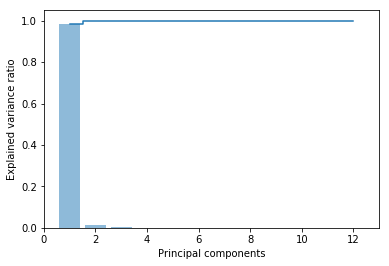

In [27]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [28]:
n_neighbors = 10
n_components = 2

Wall time: 62 ms


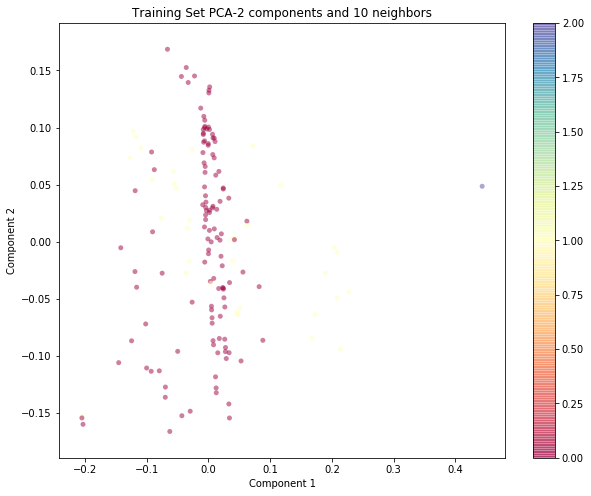

In [29]:
% time Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,\
                                    eigen_solver='auto',\
                                    method='standard').fit_transform(X_train_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Training Set PCA-2 components and 10 neighbors')
plt.scatter(Y2[:, 0], Y2[:, 1], c=y_train, cmap=plt.cm.Spectral,edgecolors='none',s=25,alpha=0.5);
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

In [30]:
pca = PCA()
X_test_pca = pca.fit_transform(X_test_std)
pca.explained_variance_ratio_
print X_test_pca.shape

(68L, 12L)


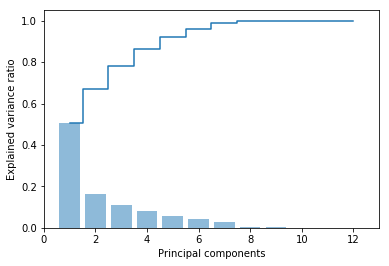

In [31]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [32]:
n_neighbors = 10
n_components = 2

Wall time: 32 ms


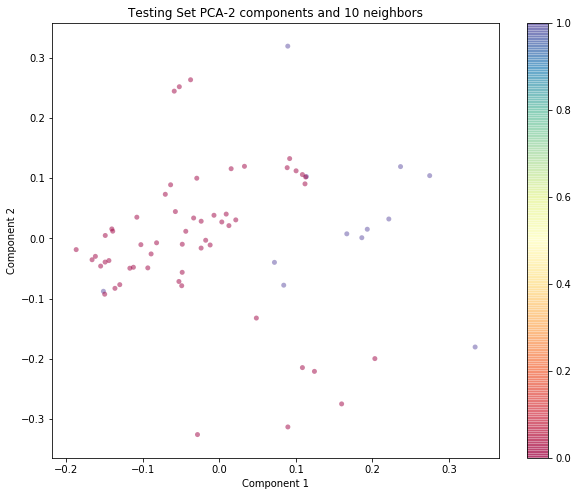

In [33]:
% time Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,\
                                    eigen_solver='auto',\
                                    method='standard').fit_transform(X_test_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Testing Set PCA-2 components and 10 neighbors')
plt.scatter(Y2[:, 0], Y2[:, 1], c=y_test, cmap=plt.cm.Spectral,edgecolors='none',s=25,alpha=0.5);
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

### K-means

In [34]:
from sklearn.cluster import KMeans
Y = KMeans(n_clusters=2).fit_transform(X_train_std)

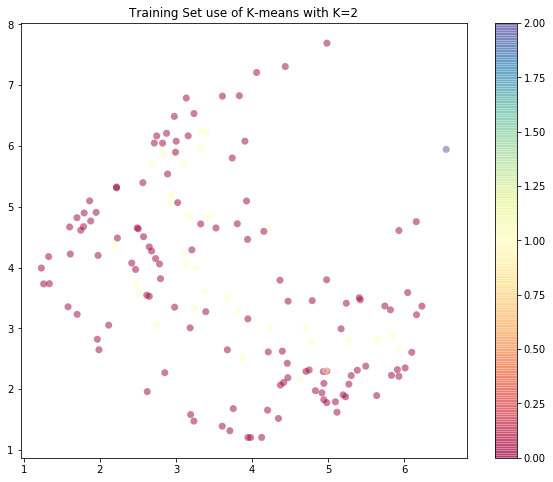

In [35]:
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.scatter(Y[:, 0], Y[:, 1], c=y_train, cmap=plt.cm.Spectral,edgecolors='none',s=50,alpha=0.5);
plt.title('Training Set use of K-means with K=2')
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

In [36]:
Y1 = KMeans(n_clusters=2).fit_transform(X_test_std)

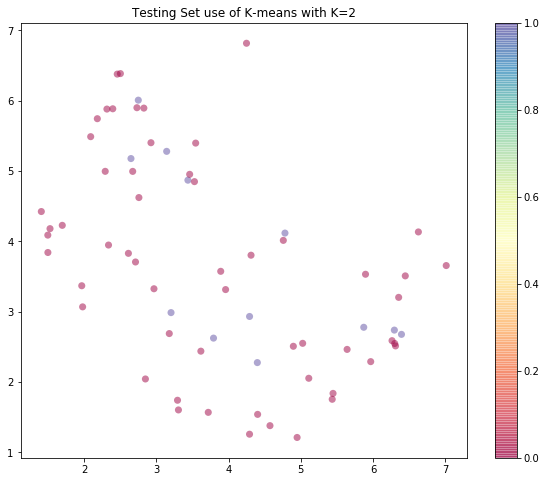

In [37]:
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.scatter(Y1[:, 0], Y1[:, 1], c=y_test, cmap=plt.cm.Spectral,edgecolors='none',s=50,alpha=0.5);
plt.title('Testing Set use of K-means with K=2')
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

### Random Forests

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_train_std, y_train)

print grid
# summarize the results of the grid search
print 'Grid Training Set Best Score: ',grid.best_score_
print 'Grid Training Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Grid Training Set Best Score:  0.9743589743589743
Grid Training Set Best Number of Trees Estimator:  50


C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_test_std, y_test)

print grid
# summarize the results of the grid search
print 'Grid Testing Set Best Score: ',grid.best_score_
print 'Grid Testing Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Grid Testing Set Best Score:  0.9411764705882353
Grid Testing Set Best Number of Trees Estimator:  100


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
#grid.fit(X_test_std, y_test)

grid.fit(X_train_std, y_train)
print grid
print 'Grid Training Set Best Score: ',grid.best_score_
print 'Grid Training Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Grid Training Set Best Score:  0.9743589743589743
Grid Training Set Best Number of Trees Estimator:  50
